## Introduction:

Main Goals:

1. Identify the recipients that will engage with the campaign.
2. Maximise the campaign’s revenue.


Comments

- The dataset contains only 5% of donors.
- The donations are usually smaller than $20.
- This data is quite noisy, high dimensional.
- There is an inverse relationship between the probability to donate and the amount donated.


Link for dataset and some analysis ==> 

https://github.com/rebordao/kdd98cup

https://github.com/bobbyantonio/KDD98/blob/master/CleanData.py

In [472]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, linear_model
from tensorflow.python.ops import rnn, rnn_cell
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sknn.mlp import Regressor, Layer
import pandas as pd

## preprocessing ..
# import Preprocessor
# from lib.analyser import Analyser
# import Performance


## plotting .. 
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

import csv
import sys

import datetime as dt


## warnings
import warnings
warnings.filterwarnings("ignore")

In [473]:
list_of_lists = []

with open('mailingData_train.txt') as f:
    for line in f:
        inner_list = [line.strip() for line in line.split(',')]
        list_of_lists.append(inner_list)
    df = pd.DataFrame(list_of_lists)

In [474]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,471,472,473,474,475,476,477,478,479,480
0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
1,8901,GRI,0,IL,61081,,,3712,0,,...,0,0,L,4,E,X,X,X,39,C
2,9401,BOA,1,CA,91326,,,5202,0,,...,0,0,L,2,G,X,X,X,1,A
3,9001,AMH,1,NC,27017,,,0,0,,...,0,1,L,4,E,X,X,X,60,C
4,8701,BRY,0,CA,95953,,,2801,0,,...,0,1,L,4,E,X,X,X,41,C


In [475]:
 np.shape(df)

(95413, 481)

In [476]:
names = df.iloc[0, :]
df.columns = names
df.drop(df.index[0], inplace=True)
df.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
1,8901,GRI,0,IL,61081,,,3712,0,,...,0,0,L,4,E,X,X,X,39,C
2,9401,BOA,1,CA,91326,,,5202,0,,...,0,0,L,2,G,X,X,X,1,A
3,9001,AMH,1,NC,27017,,,0,0,,...,0,1,L,4,E,X,X,X,60,C
4,8701,BRY,0,CA,95953,,,2801,0,,...,0,1,L,4,E,X,X,X,41,C
5,8601,,0,FL,33176,,,2001,0,X,...,0,1,L,2,F,X,X,X,26,A


In [477]:
df.isnull().any()

0
ODATEDW     False
OSOURCE     False
TCODE       False
STATE       False
ZIP         False
MAILCODE    False
PVASTATE    False
DOB         False
NOEXCH      False
RECINHSE    False
RECP3       False
RECPGVG     False
RECSWEEP    False
MDMAUD      False
DOMAIN      False
CLUSTER     False
AGE         False
AGEFLAG     False
HOMEOWNR    False
CHILD03     False
CHILD07     False
CHILD12     False
CHILD18     False
NUMCHLD     False
INCOME      False
GENDER      False
WEALTH1     False
HIT         False
MBCRAFT     False
MBGARDEN    False
            ...  
RAMNT_20    False
RAMNT_21    False
RAMNT_22    False
RAMNT_23    False
RAMNT_24    False
RAMNTALL    False
NGIFTALL    False
CARDGIFT    False
MINRAMNT    False
MINRDATE    False
MAXRAMNT    False
MAXRDATE    False
LASTGIFT    False
LASTDATE    False
FISTDATE    False
NEXTDATE    False
TIMELAG     False
AVGGIFT     False
CONTROLN    False
TARGET_B    False
TARGET_D    False
HPHONE_D    False
RFA_2R      False
RFA_2F      False
RFA_2A  

no missing values .. lets double check ..

In [478]:
df.isnull().any().any()

False

In [479]:
df.isnull().sum()

0
ODATEDW     0
OSOURCE     0
TCODE       0
STATE       0
ZIP         0
MAILCODE    0
PVASTATE    0
DOB         0
NOEXCH      0
RECINHSE    0
RECP3       0
RECPGVG     0
RECSWEEP    0
MDMAUD      0
DOMAIN      0
CLUSTER     0
AGE         0
AGEFLAG     0
HOMEOWNR    0
CHILD03     0
CHILD07     0
CHILD12     0
CHILD18     0
NUMCHLD     0
INCOME      0
GENDER      0
WEALTH1     0
HIT         0
MBCRAFT     0
MBGARDEN    0
           ..
RAMNT_20    0
RAMNT_21    0
RAMNT_22    0
RAMNT_23    0
RAMNT_24    0
RAMNTALL    0
NGIFTALL    0
CARDGIFT    0
MINRAMNT    0
MINRDATE    0
MAXRAMNT    0
MAXRDATE    0
LASTGIFT    0
LASTDATE    0
FISTDATE    0
NEXTDATE    0
TIMELAG     0
AVGGIFT     0
CONTROLN    0
TARGET_B    0
TARGET_D    0
HPHONE_D    0
RFA_2R      0
RFA_2F      0
RFA_2A      0
MDMAUD_R    0
MDMAUD_F    0
MDMAUD_A    0
CLUSTER2    0
GEOCODE2    0
dtype: int64

In [480]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('O'): ['ODATEDW',
  'OSOURCE',
  'TCODE',
  'STATE',
  'ZIP',
  'MAILCODE',
  'PVASTATE',
  'DOB',
  'NOEXCH',
  'RECINHSE',
  'RECP3',
  'RECPGVG',
  'RECSWEEP',
  'MDMAUD',
  'DOMAIN',
  'CLUSTER',
  'AGE',
  'AGEFLAG',
  'HOMEOWNR',
  'CHILD03',
  'CHILD07',
  'CHILD12',
  'CHILD18',
  'NUMCHLD',
  'INCOME',
  'GENDER',
  'WEALTH1',
  'HIT',
  'MBCRAFT',
  'MBGARDEN',
  'MBBOOKS',
  'MBCOLECT',
  'MAGFAML',
  'MAGFEM',
  'MAGMALE',
  'PUBGARDN',
  'PUBCULIN',
  'PUBHLTH',
  'PUBDOITY',
  'PUBNEWFN',
  'PUBPHOTO',
  'PUBOPP',
  'DATASRCE',
  'MALEMILI',
  'MALEVET',
  'VIETVETS',
  'WWIIVETS',
  'LOCALGOV',
  'STATEGOV',
  'FEDGOV',
  'SOLP3',
  'SOLIH',
  'MAJOR',
  'WEALTH2',
  'GEOCODE',
  'COLLECT1',
  'VETERANS',
  'BIBLE',
  'CATLG',
  'HOMEE',
  'PETS',
  'CDPLAY',
  'STEREO',
  'PCOWNERS',
  'PHOTO',
  'CRAFTS',
  'FISHER',
  'GARDENIN',
  'BOATS',
  'WALKER',
  'KIDSTUFF',
  'CARDS',
  'PLATES',
  'LIFESRC',
  'PEPSTRFL',
  'POP901',
  'POP902',
  'POP903',
  'POP90C1

It is very strange to have a type of categorical data for all variables ..



### Variable distribution

    [1:28] # demographics
    [29:42] # response to other types of mail orders
    [43:55] # overlay data
    [56:74] # donor interests
    [75] # PEP star RFA status
    [76:361] # characteristics of donor neighborhood
    [362:407] # promotion history
    [408:412] # summary variables of promotion history
    [413:456] # giving history
    [457:469] # summary variables of giving history
    [470:473] ## ID & TARGETS
    [474:479] # RFA (recency-frequency-donation amount)
    [480:481] # cluster & geocode

In [481]:
df.describe()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
count,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,...,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412
unique,54,896,55,57,19938,2,3,947,4,2,...,71,2,1,4,4,5,4,5,63,6
top,9501,MBC,0,CA,85351,,,0,0,,...,0,1,L,1,F,X,X,X,13,A
freq,15358,4539,40917,17343,61,94013,93954,23661,95085,88709,...,90569,47765,95412,47675,46964,95118,95118,95118,3466,34484


## Data Exploration:

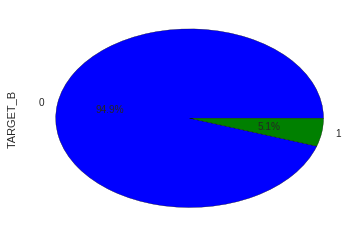

In [482]:
df.TARGET_B.value_counts().plot(x=None, y=None, kind = 'pie', autopct='%1.1f%%')

In [483]:
# % of donors
print 'Percentage of donors: %s' % (100.0 * sum(df.TARGET_B.astype('float'))/df.shape[0])

Percentage of donors: 5.07588144049


about only 5% of the samples are doners .. 

(array([ 70.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.00000000e+00,   1.29392857e+04,   2.58775714e+04,
          3.88158571e+04,   5.17541429e+04,   6.46924286e+04,
          7.76307143e+04,   9.05690000e+04]),
 <a list of 7 Patch objects>)

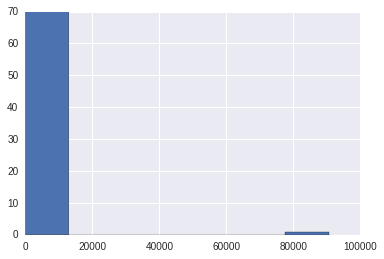

In [484]:
plt.hist(df.TARGET_D.value_counts(), bins = 7)

Histogram is not the best choice .. let's try another plot .. 

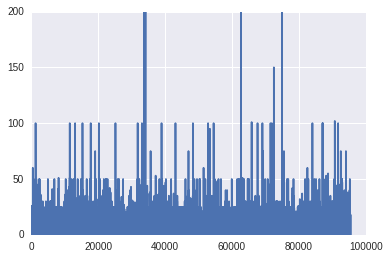

In [485]:
plt.plot(df[df.TARGET_D > 0].TARGET_D)

In [486]:
# % of donors
print 'Percentage of donors: %s' % (100.0 * sum(df.TARGET_D.astype('float'))/df.shape[0])

Percentage of donors: 79.307319834


about 79% of the continous predictor are doners ..

are there any donation amounts of zero ?!

In [487]:
df.TARGET_D.value_counts()

0        90569
10         941
15         591
20         577
5          503
25         392
12         161
7          126
6          124
11         118
8          114
30          99
21          92
3           86
16          85
14          81
4           76
9           71
50          68
13          64
17          63
23          40
35          39
18          37
40          27
19          27
26          26
22          23
100         22
2           21
         ...  
47           5
200          4
31           3
60           3
51           3
33           3
43           2
42           2
53           2
44           2
46           2
34           2
29           2
41           2
18.25        1
150          1
10.7         1
95           1
101          1
5.25         1
17.5         1
48           1
7.5          1
55           1
16.87        1
4.5          1
44.21        1
13.92        1
2.5          1
102          1
Name: TARGET_D, dtype: int64

In fact .. the majority of the customers donated zero amounts ! .. these are the customer of interest during the analysis .. the goal is to make them donate more .. 

In [488]:
df.describe()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
count,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,...,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412
unique,54,896,55,57,19938,2,3,947,4,2,...,71,2,1,4,4,5,4,5,63,6
top,9501,MBC,0,CA,85351,,,0,0,,...,0,1,L,1,F,X,X,X,13,A
freq,15358,4539,40917,17343,61,94013,93954,23661,95085,88709,...,90569,47765,95412,47675,46964,95118,95118,95118,3466,34484


In [489]:
age =  ['AGE901',
  'AGE902',
  'AGE903',
  'AGE904',
  'AGE905',
  'AGE906',
  'AGE907',
  'AGEC1',
  'AGEC2',
  'AGEC3',
  'AGEC4',
  'AGEC5',
  'AGEC6',
  'AGEC7']
df[age].head()

,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7
1,39,48,51,40,50,54,25,11,14,18,17,13,11,15
2,34,41,43,32,42,45,32,13,14,33,23,10,4,2
3,35,43,46,37,45,49,23,13,20,19,16,13,10,8
4,32,40,44,34,43,47,25,15,25,17,17,12,7,7
5,33,45,50,36,46,50,27,14,21,13,15,20,12,5


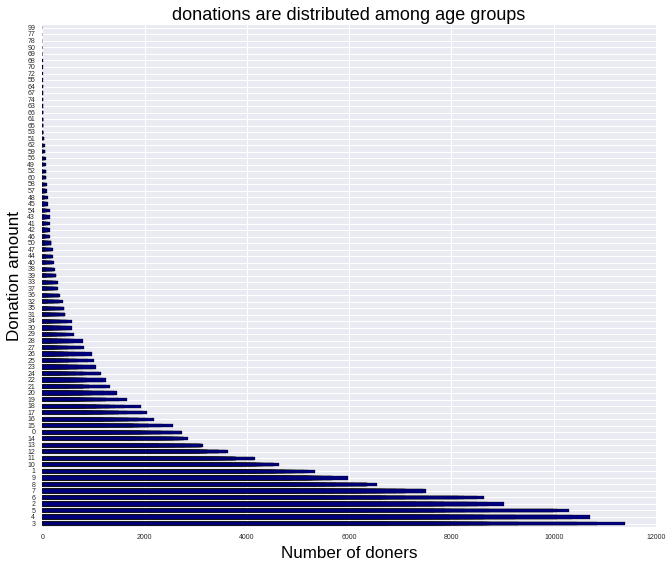

In [490]:
## plotting the rest of variables ..
for i in df[age]:
    df[age][i].value_counts().plot(kind='barh', stacked=True, fontsize=7, figsize=[11,9], colormap='gist_ncar')
    plt.title('donations are distributed among age groups', fontsize=18, color='black') 
    plt.xlabel('Number of doners', fontsize=17, color='black') 
    plt.ylabel('Donation amount', fontsize=17, color='black') 

The majority of the doners donate low amounts and only few of them donate about $200

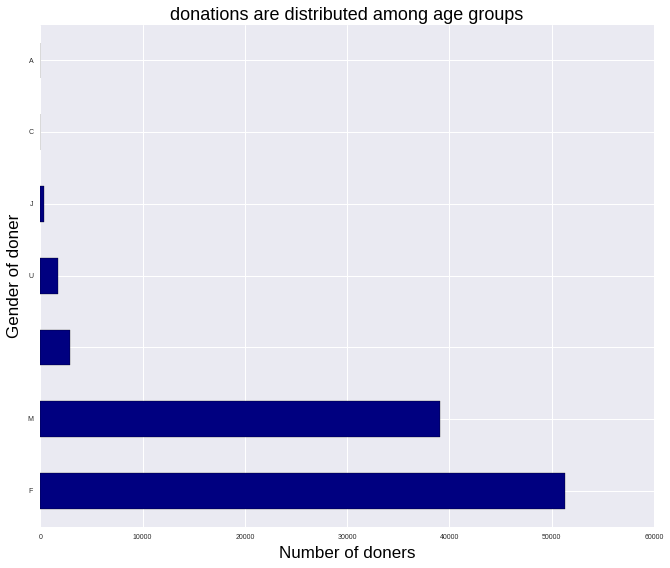

In [491]:
## how donations are distributed per gender

df['GENDER'].value_counts().plot(kind='barh', stacked=True, fontsize=7, figsize=[11,9], colormap='gist_ncar')
plt.title('donations are distributed among age groups', fontsize=18, color='black') 
plt.xlabel('Number of doners', fontsize=17, color='black') 
plt.ylabel('Gender of doner', fontsize=17, color='black') 

In [492]:
df['GENDER'].unique()

array(['F', 'M', '', 'C', 'U', 'J', 'A'], dtype=object)

It's very strange to have gender rather than M and F !! .. 

Let's impute any other value with the mode of this variable ..

In [493]:
df['GENDER'] = np.where(df['GENDER'] == 'C', df['GENDER'].mode(), df['GENDER'])
df['GENDER'] = np.where(df['GENDER'] == 'U', df['GENDER'].mode(), df['GENDER'])
df['GENDER'] = np.where(df['GENDER'] == 'J', df['GENDER'].mode(), df['GENDER'])
df['GENDER'] = np.where(df['GENDER'] == 'A', df['GENDER'].mode(), df['GENDER'])
df['GENDER'] = np.where(df['GENDER'] == '', df['GENDER'].mode(), df['GENDER'])

In [494]:
df['GENDER'].unique()

array(['F', 'M'], dtype=object)

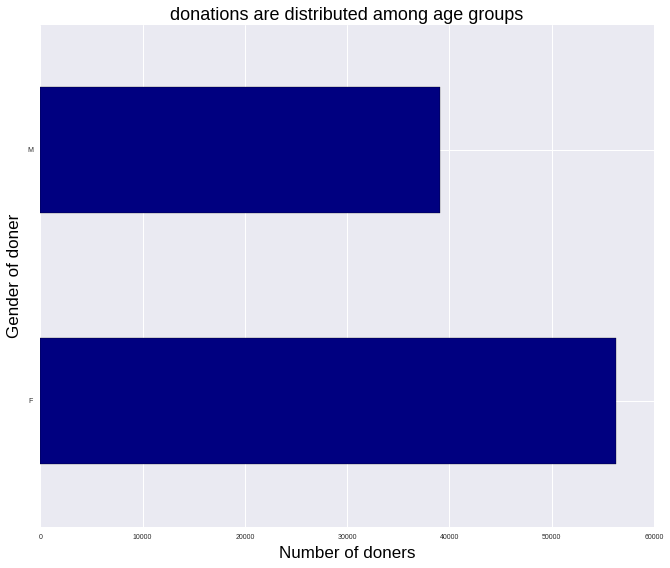

In [495]:
## how donations are distributed per gender

df['GENDER'].value_counts().plot(kind='barh', stacked=True, fontsize=7, figsize=[11,9], colormap='gist_ncar')
plt.title('donations are distributed among age groups', fontsize=18, color='black') 
plt.xlabel('Number of doners', fontsize=17, color='black') 
plt.ylabel('Gender of doner', fontsize=17, color='black') 

The majority of doners are females .. 

## Data Preprocessing:

1. Gets some redundant variables .. by calculating the correlation between all the variables .. 
those of high correlation coeffecient are redundant .. 


In [496]:
df.corr()

""


I think no results appear as all the variables are seen as categorical variables .. not numerical ones ..

__NOTE:__
In this implementation .. 

https://github.com/EAboelhamd/kdd98cup/blob/master/donors.py

They tried to figure out redundant variables to remove them .. to be able to decrease the dimentionality of the problem .. however, in my case, there is no need to do .. as I'm gonna implement deep learning not a shallow solution .. 

## Current State variables ..
Recency, Frequancy, Montery variables .. ['RFA_2R', 'RFA_2F', 'RFA_2A']

## Rewards:
- Donation amount 
- These are the target variables as well .. 
- TARGET_D, TARGET_B 


## Actions: 
- 11 mailing type

## States:

In [497]:
## current state ..
RFA = ['RFA_2R', 'RFA_2F', 'RFA_2A']
df[RFA].head()

,RFA_2R,RFA_2F,RFA_2A
1,L,4,E
2,L,2,G
3,L,4,E
4,L,4,E
5,L,2,F


In [498]:
## unique values .. current states 
for i in df[RFA]:
    print df[RFA][i].unique()
    print df[RFA][i].value_counts()

['L']
L    95412
Name: RFA_2R, dtype: int64
['4' '2' '1' '3']
1    47675
2    20545
3    15291
4    11901
Name: RFA_2F, dtype: int64
['E' 'G' 'F' 'D']
F    46964
E    21639
G    19397
D     7412
Name: RFA_2A, dtype: int64


In [499]:
## next states ..
RFA_ = ['RFA_2',
  'RFA_3',
  'RFA_4',
  'RFA_5',
  'RFA_6',
  'RFA_7',
  'RFA_8',
  'RFA_9',
  'RFA_10',
  'RFA_11',
  'RFA_12',
  'RFA_13',
  'RFA_14',
  'RFA_15',
  'RFA_16',
  'RFA_17',
  'RFA_18',
  'RFA_19',
  'RFA_20',
  'RFA_21',
  'RFA_22',
  'RFA_23',
  'RFA_24']

df[RFA_].head()

,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,...,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24
1,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,...,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E
2,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,...,,L1E,,,N1E,N1E,N1E,N1E,,F1E
3,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,...,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D
4,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,...,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,
5,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,...,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D


In [500]:
## checked states .. 
RFA__ = ['MDMAUD_R',
  'MDMAUD_F',
  'MDMAUD_A']
df[RFA__].head()

,MDMAUD_R,MDMAUD_F,MDMAUD_A
1,X,X,X
2,X,X,X
3,X,X,X
4,X,X,X
5,X,X,X


In [501]:
## unique values 
for i in df[RFA__]:
    print df[RFA__][i].unique()
    print df[RFA__][i].value_counts()

['X' 'C' 'D' 'L' 'I']
X    95118
C      109
L       70
D       65
I       50
Name: MDMAUD_R, dtype: int64
['X' '1' '2' '5']
X    95118
1      187
2       87
5       20
Name: MDMAUD_F, dtype: int64
['X' 'C' 'M' 'L' 'T']
X    95118
C      249
L       23
M       17
T        5
Name: MDMAUD_A, dtype: int64


I'm gonna select the set of variable in a dataframe called (RFA) to represent my current states variables .. as they don't contain X value i.e. missing and interpretable i.e. not in a form of a sequance (S2E) ..

I think (RFA_) might represent the next states varaiables ..

## Rewards:

- Donation amount in dollars (from zero to $1000) ==> continous variable
- Donation flag ==> Binary discrete variable


In [502]:
predictor = ['TARGET_D', 'TARGET_B']
df[predictor].head()

,TARGET_D,TARGET_B
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0


In [503]:
for i in df[predictor]:
    print df[predictor][i].unique()
    print df[predictor][i].value_counts()

['0' '4' '7' '5' '13' '10' '25' '8' '20' '16' '26' '15' '3' '60' '23' '6'
 '11' '18' '16.87' '2.5' '50' '10.7' '35' '14' '21' '17' '100' '2' '12'
 '19' '40' '38' '45' '30' '12.5' '7.5' '1' '9' '36' '22' '24' '41' '51'
 '28' '32' '43' '31' '33' '75' '47' '27' '37' '42' '18.25' '34' '13.92'
 '29' '200' '46' '44' '53' '5.25' '95' '17.5' '48' '101' '150' '4.5' '55'
 '102' '44.21']
0        90569
10         941
15         591
20         577
5          503
25         392
12         161
7          126
6          124
11         118
8          114
30          99
21          92
3           86
16          85
14          81
4           76
9           71
50          68
13          64
17          63
23          40
35          39
18          37
40          27
19          27
26          26
22          23
100         22
2           21
         ...  
47           5
200          4
31           3
60           3
51           3
33           3
43           2
42           2
53           2
44           2
46   

I'm gonna work on TARGET_D variable as it represents continous values and my task is a regression task not a classification one .. 
Let's explore some other variables .. related to donation amounts ..

In [504]:
rewards = df['TARGET_B']
rewards.head()

1    0
2    0
3    0
4    0
5    0
Name: TARGET_B, dtype: object

In [505]:
reward_amounts = ['RAMNT_3',
  'RAMNT_4',
  'RAMNT_5',
  'RAMNT_6',
  'RAMNT_7',
  'RAMNT_8',
  'RAMNT_9',
  'RAMNT_10',
  'RAMNT_11',
  'RAMNT_12',
  'RAMNT_13',
  'RAMNT_14',
  'RAMNT_15',
  'RAMNT_16',
  'RAMNT_17',
  'RAMNT_18',
  'RAMNT_19',
  'RAMNT_20',
  'RAMNT_21',
  'RAMNT_22',
  'RAMNT_23',
  'RAMNT_24',
  'RAMNTALL']
df[reward_amounts].head()

,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,...,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL
1,,,,,,,,10,,,...,11,11,,,,,,11,9,240
2,,,,,,,25,,,,...,12,,,,,,,,,47
3,,,,,,,,,,11,...,9,,8,,,,8,7,6,202
4,,,,,,,,,10,10,...,7,11,,,6,11,,,,109
5,,,,,,15,,,,,...,,,,,,,,,,254


In [506]:
for i in df[reward_amounts]:
    print (df[reward_amounts][i].value_counts())

       95170
10        37
5         31
7         21
20        20
15        18
3         15
25        13
8         12
12         9
9          9
6          8
14         8
50         6
4          6
2          5
11         4
16         3
30         2
23         2
21         2
13         2
17         2
19         1
40         1
18         1
35         1
22         1
29         1
3.5        1
Name: RAMNT_3, dtype: int64
         95131
10          72
5           47
15          34
25          20
20          14
7           12
11           8
12           8
9            8
50           6
100          5
8            5
14           5
3            4
13           4
30           4
2            3
17           3
1            2
40           2
6            2
4            2
16           2
36           1
18           1
7.5          1
24           1
16.77        1
35           1
20.5         1
32           1
26           1
Name: RAMNT_4, dtype: int64
      95403
5         1
50        1
31        1
8         1

         86011
10        2118
5         1555
15         958
20         831
25         499
7          377
11         348
3          315
6          285
12         281
9          216
8          205
16         199
14         153
13         141
4          137
30          84
50          80
18          69
21          63
17          62
2           59
19          43
22          41
35          40
40          32
23          24
24          17
27          16
         ...  
41           2
2.5          2
145          1
150          1
104          1
85           1
108          1
77           1
20.25        1
500          1
17.32        1
65           1
61           1
130          1
51           1
6.95         1
52           1
56           1
57           1
54           1
55           1
7.5          1
12.5         1
7.06         1
44           1
300          1
39           1
34           1
32.95        1
50.36        1
Name: RAMNT_17, dtype: int64
         75634
10        4251
5         3343
15        1

In [507]:
df['RAMNTALL'].describe()

count     95412
unique     2094
top          20
freq       4206
Name: RAMNTALL, dtype: object

## Actions:

- mailing types ..

The following lists the promotion codes and their 
                            respective field names (where XXXX refers to ADATE, RFA, 
                            RDATE and RAMNT.) 
                            
                            '97NK' ==> xxxx_2 (mailing was used to construct 
                                               the target fields)
                            '96NK' ==> xxxx_3
                            '96TK' ==> xxxx_4
                            '96SK' ==> xxxx_5
                            '96LL' ==> xxxx_6
                            '96G1' ==> xxxx_7
                            '96GK' ==> xxxx_8
                            '96CC' ==> xxxx_9
                            '96WL' ==> xxxx_10
                            '96X1' ==> xxxx_11
                            '96XK' ==> xxxx_12
                            '95FS' ==> xxxx_13
                            
                            '95NK' ==> xxxx_14
                            '95TK' ==> xxxx_15
                            '95LL' ==> xxxx_16
                            '95G1' ==> xxxx_17
                            '95GK' ==> xxxx_18
                            '95CC' ==> xxxx_19
                            '95WL' ==> xxxx_20
                            '95X1' ==> xxxx_21
                            '95XK' ==> xxxx_22
                            '94FS' ==> xxxx_23
                            '94NK' ==> xxxx_24

                            1st 2 bytes of the code refers to the year of the 
                            mailing while 3rd and 4th bytes refer to the 
                            following promotion codes/types: 

                            LL mailings had labels only
                            WL mailings had labels only
                            CC mailings are calendars with stickers but do
                               not have labels
                            FS mailings are blank cards that fold into
                               thirds with labels
                            NK mailings are blank cards with labels
                            SK mailings are blank cards with labels
                            TK mailings have thank you printed on the
                               outside with labels
                            GK mailings are general greeting cards (an
                               assortment of birthday, sympathy, blank, & get
                               well) with labels
                            XK mailings are Christmas cards with labels
                            X1 mailings have labels and a notepad
                            G1 mailings have labels and a notepad
        
- This is why I'm gonna extract the last two digits from the sequance to represent mailing type (unique values are 11 .. NK, TK, SK, LL, G1, GK, CC, WL, X1, XK, FS) + no action .. total action are 12

In [508]:
actions = ['ADATE_2',
  'ADATE_3',
  'ADATE_4',
  'ADATE_5',
  'ADATE_6',
  'ADATE_7',
  'ADATE_8',
  'ADATE_9',
  'ADATE_10',
  'ADATE_11',
  'ADATE_12',
  'ADATE_13',
  'ADATE_14',
  'ADATE_15',
  'ADATE_16',
  'ADATE_17',
  'ADATE_18',
  'ADATE_19',
  'ADATE_20',
  'ADATE_21',
  'ADATE_22',
  'ADATE_23',
  'ADATE_24']

df[actions].head()

,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,...,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24
1,9706,9606,9604,9604,9603,9602,9601,9511,9510,9510,...,9504,9503,9502,9501,9411,9411,9410,9409,9407,9406
2,9706,9606,9604,9604,9603,9602,9601,9511,9510,9510,...,,9503,,,9411,9411,9410,9409,,9406
3,9706,9606,9604,9604,9603,9602,9601,9511,,9510,...,9504,9503,,9501,9411,,,9409,9407,9406
4,9706,9606,9604,9604,9603,9602,9601,9511,,9510,...,9504,9503,9502,9501,9411,9411,9410,9409,,
5,9706,9606,9604,9604,9603,9512,9601,9511,9510,9509,...,,9503,9502,9412,9411,9411,9410,9506,9407,9406


In [509]:
## unique values .. I think this makes sense ..values are from 94 to 97 !
for i in df[actions]:
    print df[actions][i].unique()

['9706' '9704']
['9606' '' '9604']
['9604' '' '9607' '9609' '9605' '9511' '9602' '9603' '9512']
['9604' '']
['9603' '' '9601']
['9602' '9512' '9601' '']
['9601' '9512' '' '9511' '9603' '9605']
['9511' '' '9509' '9510']
['9510' '' '9511']
['9510' '9509' '9511' '' '9508']
['9508' '9509' '' '9510' '9507']
['9507' '' '9502' '9506']
['9506' '' '9504']
['9504' '']
['9503' '' '9504' '9502']
['9502' '' '9501' '9503']
['9501' '' '9412' '9505' '9411' '9409' '9504' '9508' '9503' '9502']
['9411' '' '9409' '9410']
['9411' '' '9412']
['9410' '' '9409']
['9409' '9506' '9408' '' '9410' '9411']
['9407' '' '9406' '9312']
['9406' '' '9405']


In [510]:
df['ADATE_2'].unique()

array(['9706', '9704'], dtype=object)

## Regression phase:

Before performing the prediction task .. let's split the data to training and validation sets .. 

In [511]:
df = df[df.columns.difference(['TARGET_D'])]

To avoid any problems in prediction by having string variables .. let's binarize (catergorize) all the variables .. 

In [512]:
data = ['ODATEDW',
  'OSOURCE',
  'TCODE',
  'STATE',
  'ZIP',
  'MAILCODE',
  'PVASTATE',
  'DOB',
  'NOEXCH',
  'RECINHSE',
  'RECP3',
  'RECPGVG',
  'RECSWEEP',
  'MDMAUD',
  'DOMAIN',
  'CLUSTER',
  'AGE',
  'AGEFLAG',
  'HOMEOWNR',
  'CHILD03',
  'CHILD07',
  'CHILD12',
  'CHILD18',
  'NUMCHLD',
  'INCOME',
  'GENDER',
  'WEALTH1',
  'HIT',
  'MBCRAFT',
  'MBGARDEN',
  'MBBOOKS',
  'MBCOLECT',
  'MAGFAML',
  'MAGFEM',
  'MAGMALE',
  'PUBGARDN',
  'PUBCULIN',
  'PUBHLTH',
  'PUBDOITY',
  'PUBNEWFN',
  'PUBPHOTO',
  'PUBOPP',
  'DATASRCE',
  'MALEMILI',
  'MALEVET',
  'VIETVETS',
  'WWIIVETS',
  'LOCALGOV',
  'STATEGOV',
  'FEDGOV',
  'SOLP3',
  'SOLIH',
  'MAJOR',
  'WEALTH2',
  'GEOCODE',
  'COLLECT1',
  'VETERANS',
  'BIBLE',
  'CATLG',
  'HOMEE',
  'PETS',
  'CDPLAY',
  'STEREO',
  'PCOWNERS',
  'PHOTO',
  'CRAFTS',
  'FISHER',
  'GARDENIN',
  'BOATS',
  'WALKER',
  'KIDSTUFF',
  'CARDS',
  'PLATES',
  'LIFESRC',
  'PEPSTRFL',
  'POP901',
  'POP902',
  'POP903',
  'POP90C1',
  'POP90C2',
  'POP90C3',
  'POP90C4',
  'POP90C5',
  'ETH1',
  'ETH2',
  'ETH3',
  'ETH4',
  'ETH5',
  'ETH6',
  'ETH7',
  'ETH8',
  'ETH9',
  'ETH10',
  'ETH11',
  'ETH12',
  'ETH13',
  'ETH14',
  'ETH15',
  'ETH16',
  'AGE901',
  'AGE902',
  'AGE903',
  'AGE904',
  'AGE905',
  'AGE906',
  'AGE907',
  'CHIL1',
  'CHIL2',
  'CHIL3',
  'AGEC1',
  'AGEC2',
  'AGEC3',
  'AGEC4',
  'AGEC5',
  'AGEC6',
  'AGEC7',
  'CHILC1',
  'CHILC2',
  'CHILC3',
  'CHILC4',
  'CHILC5',
  'HHAGE1',
  'HHAGE2',
  'HHAGE3',
  'HHN1',
  'HHN2',
  'HHN3',
  'HHN4',
  'HHN5',
  'HHN6',
  'MARR1',
  'MARR2',
  'MARR3',
  'MARR4',
  'HHP1',
  'HHP2',
  'DW1',
  'DW2',
  'DW3',
  'DW4',
  'DW5',
  'DW6',
  'DW7',
  'DW8',
  'DW9',
  'HV1',
  'HV2',
  'HV3',
  'HV4',
  'HU1',
  'HU2',
  'HU3',
  'HU4',
  'HU5',
  'HHD1',
  'HHD2',
  'HHD3',
  'HHD4',
  'HHD5',
  'HHD6',
  'HHD7',
  'HHD8',
  'HHD9',
  'HHD10',
  'HHD11',
  'HHD12',
  'ETHC1',
  'ETHC2',
  'ETHC3',
  'ETHC4',
  'ETHC5',
  'ETHC6',
  'HVP1',
  'HVP2',
  'HVP3',
  'HVP4',
  'HVP5',
  'HVP6',
  'HUR1',
  'HUR2',
  'RHP1',
  'RHP2',
  'RHP3',
  'RHP4',
  'HUPA1',
  'HUPA2',
  'HUPA3',
  'HUPA4',
  'HUPA5',
  'HUPA6',
  'HUPA7',
  'RP1',
  'RP2',
  'RP3',
  'RP4',
  'MSA',
  'ADI',
  'DMA',
  'IC1',
  'IC2',
  'IC3',
  'IC4',
  'IC5',
  'IC6',
  'IC7',
  'IC8',
  'IC9',
  'IC10',
  'IC11',
  'IC12',
  'IC13',
  'IC14',
  'IC15',
  'IC16',
  'IC17',
  'IC18',
  'IC19',
  'IC20',
  'IC21',
  'IC22',
  'IC23',
  'HHAS1',
  'HHAS2',
  'HHAS3',
  'HHAS4',
  'MC1',
  'MC2',
  'MC3',
  'TPE1',
  'TPE2',
  'TPE3',
  'TPE4',
  'TPE5',
  'TPE6',
  'TPE7',
  'TPE8',
  'TPE9',
  'PEC1',
  'PEC2',
  'TPE10',
  'TPE11',
  'TPE12',
  'TPE13',
  'LFC1',
  'LFC2',
  'LFC3',
  'LFC4',
  'LFC5',
  'LFC6',
  'LFC7',
  'LFC8',
  'LFC9',
  'LFC10',
  'OCC1',
  'OCC2',
  'OCC3',
  'OCC4',
  'OCC5',
  'OCC6',
  'OCC7',
  'OCC8',
  'OCC9',
  'OCC10',
  'OCC11',
  'OCC12',
  'OCC13',
  'EIC1',
  'EIC2',
  'EIC3',
  'EIC4',
  'EIC5',
  'EIC6',
  'EIC7',
  'EIC8',
  'EIC9',
  'EIC10',
  'EIC11',
  'EIC12',
  'EIC13',
  'EIC14',
  'EIC15',
  'EIC16',
  'OEDC1',
  'OEDC2',
  'OEDC3',
  'OEDC4',
  'OEDC5',
  'OEDC6',
  'OEDC7',
  'EC1',
  'EC2',
  'EC3',
  'EC4',
  'EC5',
  'EC6',
  'EC7',
  'EC8',
  'SEC1',
  'SEC2',
  'SEC3',
  'SEC4',
  'SEC5',
  'AFC1',
  'AFC2',
  'AFC3',
  'AFC4',
  'AFC5',
  'AFC6',
  'VC1',
  'VC2',
  'VC3',
  'VC4',
  'ANC1',
  'ANC2',
  'ANC3',
  'ANC4',
  'ANC5',
  'ANC6',
  'ANC7',
  'ANC8',
  'ANC9',
  'ANC10',
  'ANC11',
  'ANC12',
  'ANC13',
  'ANC14',
  'ANC15',
  'POBC1',
  'POBC2',
  'LSC1',
  'LSC2',
  'LSC3',
  'LSC4',
  'VOC1',
  'VOC2',
  'VOC3',
  'HC1',
  'HC2',
  'HC3',
  'HC4',
  'HC5',
  'HC6',
  'HC7',
  'HC8',
  'HC9',
  'HC10',
  'HC11',
  'HC12',
  'HC13',
  'HC14',
  'HC15',
  'HC16',
  'HC17',
  'HC18',
  'HC19',
  'HC20',
  'HC21',
  'MHUC1',
  'MHUC2',
  'AC1',
  'AC2',
  'ADATE_2',
  'ADATE_3',
  'ADATE_4',
  'ADATE_5',
  'ADATE_6',
  'ADATE_7',
  'ADATE_8',
  'ADATE_9',
  'ADATE_10',
  'ADATE_11',
  'ADATE_12',
  'ADATE_13',
  'ADATE_14',
  'ADATE_15',
  'ADATE_16',
  'ADATE_17',
  'ADATE_18',
  'ADATE_19',
  'ADATE_20',
  'ADATE_21',
  'ADATE_22',
  'ADATE_23',
  'ADATE_24',
  'RFA_2',
  'RFA_3',
  'RFA_4',
  'RFA_5',
  'RFA_6',
  'RFA_7',
  'RFA_8',
  'RFA_9',
  'RFA_10',
  'RFA_11',
  'RFA_12',
  'RFA_13',
  'RFA_14',
  'RFA_15',
  'RFA_16',
  'RFA_17',
  'RFA_18',
  'RFA_19',
  'RFA_20',
  'RFA_21',
  'RFA_22',
  'RFA_23',
  'RFA_24',
  'CARDPROM',
  'MAXADATE',
  'NUMPROM',
  'CARDPM12',
  'NUMPRM12',
  'RDATE_3',
  'RDATE_4',
  'RDATE_5',
  'RDATE_6',
  'RDATE_7',
  'RDATE_8',
  'RDATE_9',
  'RDATE_10',
  'RDATE_11',
  'RDATE_12',
  'RDATE_13',
  'RDATE_14',
  'RDATE_15',
  'RDATE_16',
  'RDATE_17',
  'RDATE_18',
  'RDATE_19',
  'RDATE_20',
  'RDATE_21',
  'RDATE_22',
  'RDATE_23',
  'RDATE_24',
  'RAMNT_3',
  'RAMNT_4',
  'RAMNT_5',
  'RAMNT_6',
  'RAMNT_7',
  'RAMNT_8',
  'RAMNT_9',
  'RAMNT_10',
  'RAMNT_11',
  'RAMNT_12',
  'RAMNT_13',
  'RAMNT_14',
  'RAMNT_15',
  'RAMNT_16',
  'RAMNT_17',
  'RAMNT_18',
  'RAMNT_19',
  'RAMNT_20',
  'RAMNT_21',
  'RAMNT_22',
  'RAMNT_23',
  'RAMNT_24',
  'RAMNTALL',
  'NGIFTALL',
  'CARDGIFT',
  'MINRAMNT',
  'MINRDATE',
  'MAXRAMNT',
  'MAXRDATE',
  'LASTGIFT',
  'LASTDATE',
  'FISTDATE',
  'NEXTDATE',
  'TIMELAG',
  'AVGGIFT',
  'CONTROLN',
  'TARGET_B',
  'HPHONE_D',
  'RFA_2R',
  'RFA_2F',
  'RFA_2A',
  'MDMAUD_R',
  'MDMAUD_F',
  'MDMAUD_A',
  'CLUSTER2',
  'GEOCODE2']

for i in xrange(len(data)):
    df[data[i]] = pd.Categorical((pd.factorize(df[data[i]])[0] + 1).astype(str))
    
df[data].head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_B,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,1,1,2,1,1,...,1,1,1,2,2,1,1,1,2,2
3,3,3,2,3,3,1,1,3,1,1,...,1,2,1,1,1,1,1,1,3,1
4,4,4,1,2,4,1,1,4,1,1,...,1,2,1,1,1,1,1,1,4,1
5,5,5,1,4,5,1,1,5,1,2,...,1,2,1,2,3,1,1,1,5,2


In [513]:
train, test = train_test_split(df, test_size = 0.2)  # split data to 80-20 cross validate 

In [514]:
np.shape(train), np.shape(test)

((76329, 480), (19083, 480))

In [515]:
gamma = 0.8
Num_itrs = 10

num_epoch = 10 #epochs are cycles of Feedforward and Backprob
batch_size = 10
n_nodes_hl1 = np.shape(train)[0]
n_nodes_hl2 = np.shape(train)[0]
NUM_STATES = np.shape(train)[1]
NUM_DIM =  np.shape(train)[1]
num_nodes = np.shape(train)[0]
num_unrollings=5

Q_optimal = [] #np.zeros([np.shape(curr_state_current_action)[0], len(df['ACCOUNT_STATUS'].unique())])
# Q_predicted = np.zeros([np.shape(train)[0], len(df['ACCOUNT_STATUS'].unique())])

In [516]:
x = tf.placeholder(tf.float32, shape=[NUM_DIM, num_nodes])
y =  tf.placeholder(tf.float32, shape=[num_nodes, 1])
x

<tf.Tensor 'Placeholder_10:0' shape=(480, 76329) dtype=float32>

In [517]:
# Input gate: input, previous output, and bias.
ix = tf.Variable(tf.truncated_normal([NUM_DIM, num_nodes], 0, 1, dtype = tf.float32))# init_weights_RNN([n_nodes_hl1, NUM_ACTIONS])
im = tf.Variable(tf.truncated_normal([num_nodes, num_nodes], 0, 1, dtype = tf.float32))
ib = tf.Variable(tf.zeros([1, num_nodes], dtype = tf.float32))

# Forget gate: input, previous output, and bias.
fx = tf.Variable(tf.truncated_normal([NUM_DIM, num_nodes], 0, 1, dtype = tf.float32))
fm = tf.Variable(tf.truncated_normal([num_nodes, num_nodes], 0, 1, dtype = tf.float32))
fb = tf.Variable(tf.zeros([1, num_nodes], dtype = tf.float32))

# Memory cell: input, state and bias.                             
cx = tf.Variable(tf.truncated_normal([NUM_DIM, num_nodes], 0, 1, dtype = tf.float32))
cm = tf.Variable(tf.truncated_normal([num_nodes, num_nodes], 0, 1, dtype = tf.float32))
cb = tf.Variable(tf.zeros([1, num_nodes], dtype = tf.float32))

# Output gate: input, previous output, and bias.
ox = tf.Variable(tf.truncated_normal([NUM_DIM, num_nodes], 0, 1, dtype = tf.float32))
om = tf.Variable(tf.truncated_normal([num_nodes, num_nodes], 0, 1, dtype = tf.float32))
ob = tf.Variable(tf.zeros([1, num_nodes], dtype = tf.float32))

# Variables saving state across unrollings.
saved_output = tf.Variable(tf.zeros([1, num_nodes], dtype = tf.float32), trainable=False) #reversed

saved_state = tf.Variable(tf.zeros([1, num_nodes], dtype = tf.float32), trainable=False) #reversed

# Classifier weights and biases.
w = tf.Variable(tf.truncated_normal([num_nodes, num_nodes], 0, 1, dtype = tf.float32))
b = tf.Variable(tf.zeros([num_nodes], dtype = tf.float32))

In [518]:
 # Definition of the cell computation.
# this method takes single cell and returns single number 
def lstm_cell(i, o, state):
    input_gate = tf.sigmoid(tf.matmul(i, ix) + tf.matmul(o, im) + ib)
    print input_gate
    forget_gate = tf.sigmoid(tf.matmul(i, fx) + tf.matmul(o, fm) + fb)
    update = tf.matmul(i, cx) + tf.matmul(o, cm) + cb
    state = forget_gate * state + input_gate * tf.tanh(update)
    output_gate = tf.sigmoid(tf.matmul(i, ox) + tf.matmul(o, om) + ob)
    return output_gate * tf.tanh(state), state

In [ ]:
# for i in xrange(np.shape(train)[0]):## el loop faydetha to copy the next line that is just for single unit 
#         print train[i]

In [519]:
def lstm_model(train, saved_output, saved_state):
    # Unrolled LSTM loop.    
    outputs = list()
    output = saved_output  # row !
    state = saved_state  # row !
    
    
    # astype('U') .. to convert numpy array to string ..
    for i in xrange(np.shape(train)[0]):## el loop faydetha to copy the next line that is just for single unit 
        output_, state = lstm_cell(train, tf.cast(output, tf.float32), tf.cast(state, tf.float32)) 

#     ## in case the last values are saved !
#     with tf.control_dependencies([saved_output.assign(output), saved_state.assign(state)]):
#         model_output = tf.matmul(output_, w) + b # outputs single value
        
#     return model_output  ## the output for the whole model

In [520]:
def train_lstm_model():
    loss_RNN = []
    model_output = lstm_model(train, saved_output, saved_state) #output here is a vector
#     model_output = tf.transpose(model_output)
#     cost = tf.reduce_mean(tf.square(y - model_output))
#     optimize = tf.train.GradientDescentOptimizer(0.01).minimize(cost) 

#     sess = tf.Session()
#     init = tf.global_variables_initializer()  ## updated version from initialize_all_variables :) 
#     sess.run(init)
    
#     predicted_reward = sess.run(model_output, feed_dict={x:np.transpose(train), y: rewards})
    
# #     ## Cost calculation
#     for step in xrange(1000):
#         l,_ = sess.run([cost, optimize], feed_dict={x:np.transpose(train), y: rewards})
        
#         if step % 100 == 0:
#             loss_RNN.append(l)

#     Y_pred = tf.zeros([len(df2[rewards]),1])

# #     ## predict 
#     test_pred2 = sess.run(Y_pred, feed_dict={x: np.transpose(next_states)})

#     # rms to test ..
#     cost_test = tf.reduce_mean(tf.square(df2[rewards].values.astype(np.float32) - test_pred2))
    
#     rmse_val = sess.run(cost_test, feed_dict={x: np.transpose(next_states), y: test_pred2})
#     sess.close()
    
#     return loss_RNN, predicted_reward #saved_state, saved_output, cost_values

In [521]:
train_lstm_model()

KeyError: (0, None)